In [244]:
import numpy as np
import os
from pathlib import Path
from keras.preprocessing import image
from matplotlib import pyplot as plt

In [245]:
p=Path("./Documents/Images/")

In [246]:
print(type(p))

<class 'pathlib.PosixPath'>


In [247]:
dirs=p.glob("*")
labels_dict={"cat":0,"dog":1,"horse":2,"Human":3}
image_data=[]
labels=[]
for folder_dir in dirs:
    label=str(folder_dir).split("/")[-1][:-1]
    for image_path in folder_dir.glob("*.jpg"):
        img=image.load_img(image_path,target_size=(32,32))
        img_array=image.img_to_array(img)
        image_data.append(img_array)
        labels.append(labels_dict[label])
    
    
    

In [248]:
print(len(image_data))
print(labels)

808
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [249]:
print(len(labels))

808


In [250]:
#Convert this into numpy array
image_data=np.array(image_data,dtype='float32')/255.0
labels=np.array(labels)
print(image_data.shape,labels.shape)

(808, 32, 32, 3) (808,)


# Randomly shuffle data

In [251]:
import random
combined=list(zip(image_data,labels))

random.shuffle(combined)

#Unzip
image_data[:],labels[:]=zip(*combined)

# Visualise Data

In [252]:
def DrawImg(img):
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    return

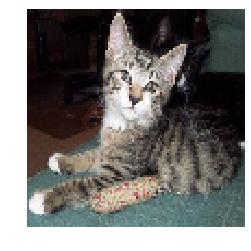

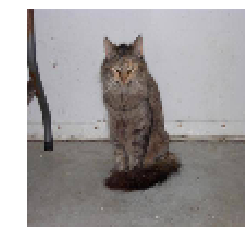

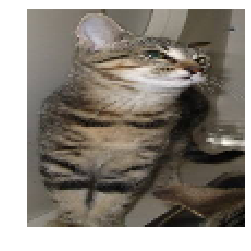

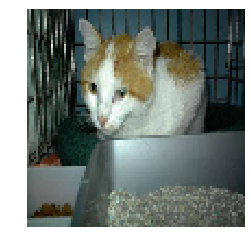

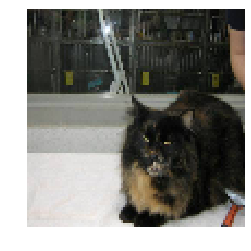

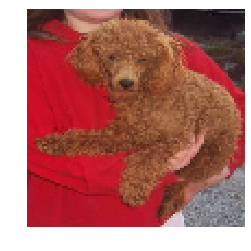

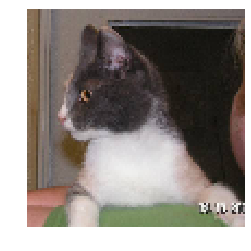

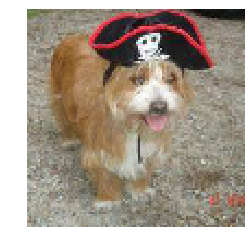

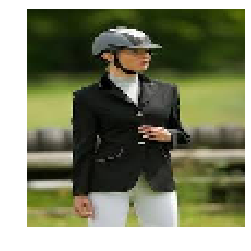

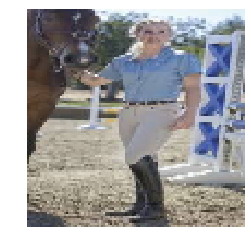

In [106]:
for i in range(10):
    DrawImg(image_data[i])

# SVM Classifier

In [253]:
class SVM:
    def __init__(self,C=1.0):
        self.C=C
        self.W=0
        self.b=0
        
    def Hingeloss(self,W,b,X,Y):
        loss=0.0
        loss +=.5*np.dot(W,W.T)
        m=X.shape[0]
        for i in range(m):
            ti=Y[i]*(np.dot(W,X[i].T)+b)
            loss+=self.C*max(0,(1-ti))
        return loss[0][0]
    def fit(self,X,Y,batch_size=100,learning_rate=0.001,maxItr=500):
        no_of_features=X.shape[1]
        no_of_samples=X.shape[0]
        
        n=learning_rate
        c=self.C
        
        #Init the model paramters
        
        W=np.zeros((1,no_of_features))
        bias=0
        print(self.Hingeloss(W,bias,X,Y))
        
        losses=[]
        for i in range(no_of_samples):
            #Training loop
            
            l=self.Hingeloss(W,bias,X,Y)
            losses.append(l)
            #Batch gradient descent with random shuffling
            ids=np.arange(no_of_samples)
            np.random.shuffle(ids)
            
            for batch_start in range(0,no_of_samples,batch_size):
                #Assume a gradient for the batch
                gradw=0
                gradb=0
                #Iterate over all examples
                for j in range(batch_start,batch_start+batch_size):
                    if j<no_of_samples:
                        i=ids[j]
                        ti=Y[i]*(np.dot(W,X[i].T)+bias)
                        
                        if ti>1:
                            gradw+=0
                            gradb+=0
                        else:
                            gradw+=c*Y[i]*X[i]
                            gradb+=c*Y[i]
                            
                #Gradient is calculated
                W=W-n*W + n*gradw
                bias=bias + n*gradb
                
        self.W=W
        self.b=bias
        return W,bias,losses
        
                    
        

# We need to convert data for one for one Classification.!


In [254]:
M=image_data.shape[0]
image_data=image_data.reshape((M,-1))
print(image_data.shape)
print(labels.shape)


(808, 3072)
(808,)


In [255]:
Classes=len(np.unique(labels))
print(Classes)

4


In [256]:
def ClasswiseData(x,y):
    data={}
    
    for i in range(Classes):
        data[i]=[]
    
    for i in range(x.shape[0]):
        data[y[i]].append(x[i])
    
    for k in data.keys():
        data[k]=np.array(data[k])
    return data

In [257]:
data=ClasswiseData(image_data,labels)

In [258]:
print(data[0].shape[0])
print(data[1].shape[0])
print(data[2].shape[0])
print(data[3].shape[0])

202
202
202
202


In [259]:
def GetDataPairforSvm(d1,d2):
    
    #Combines data of 2 classes into a single function
    l1,l2=d1.shape[0],d2.shape[0]
    samples=l1+l2
    features=d1.shape[1]
    data_pair=np.zeros((samples,features))
    data_labels=np.zeros((samples,))
    
    data_pair[:l1,:]=d1
    data_pair[l1:,:]=d2
    
    data_labels[:l1]= -1
    data_labels[l1:]= +1
    
    return data_pair,data_labels

# Training SVM

404.0
[404.0, 402.4981100726137, 400.99629871927516, 399.4946072180416, 397.99300613490453, 396.49149359166745, 394.9900667673185, 394.10997700776164, 392.60868780885494, 391.3397064643043, 390.5614364798804, 389.81006496834794, 389.34181253571586, 388.43835774908, 387.4984175176154, 386.87639837895165, 386.1416905073155, 385.1905028812017, 384.4699842460918, 383.76196633753756, 382.93912148121206, 382.1843053787576, 381.38466287557526, 380.6779810478428, 379.92032723059174, 379.07170923310935, 378.4090162860655, 377.73529269188884, 376.94077030020463, 376.12244817889587, 375.4937553989349, 374.7768247049495, 374.12343393119806, 373.3490627540139, 372.4731508689396, 371.81153992717526, 371.24814461063676, 370.7888254693501, 369.766383681902, 369.2912603201798, 368.4022843581104, 367.79417202696396, 367.3647503463538, 366.57940396025157, 365.8253965718979, 365.1510145392685, 364.3876670815597, 363.79633333896646, 363.10362344687303, 362.4819232095005, 362.23914807413763, 361.33108441975

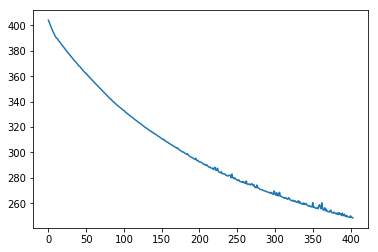

In [260]:
mySVM=SVM()
xp,yp=GetDataPairforSvm(data[0],data[1])
w,b,loss=mySVM.fit(xp,yp,learning_rate=0.00001,maxItr=1000)
print(loss)
plt.plot(loss)

In [261]:
def TrainSVM(x,y):
    svm_classifiers={}
    
    for i in range(Classes):
        svm_classifiers[i]= {}
        for j in range(i+1,Classes):
            xpair,ypair=GetDataPairforSvm(data[i],data[j])
            wts,b,loss=mySVM.fit(xpair,ypair,learning_rate=0.00001,maxItr=1000)
            svm_classifiers[i][j]=(wts,b)
            plt.plot(loss)
            plt.show()
    return svm_classifiers

404.0


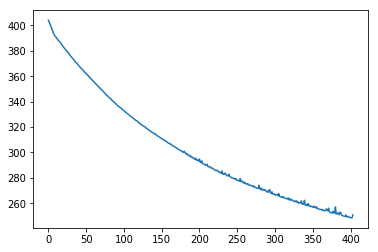

404.0


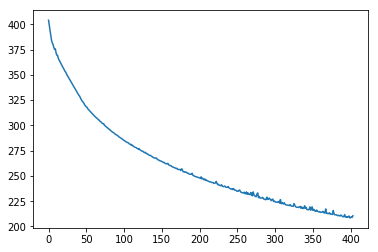

404.0


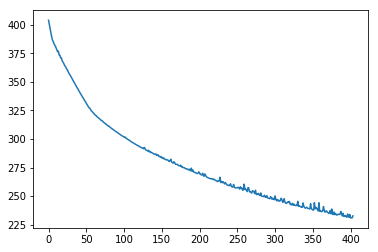

404.0


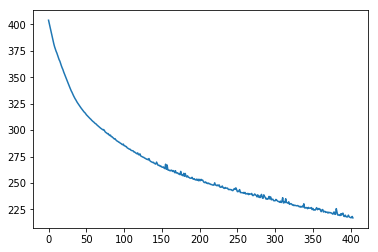

404.0


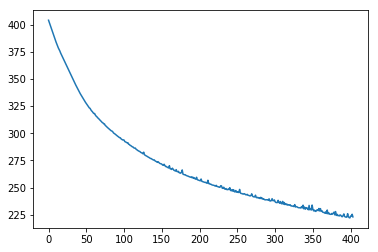

404.0


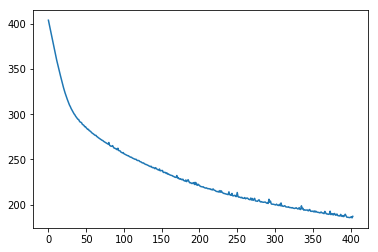

In [262]:
svm_classifiers=TrainSVM(image_data,labels)

In [263]:
dog_cats=svm_classifiers[0][1]
print(dog_cats[0])
print(dog_cats[0].shape)
print(dog_cats[1].shape)
print(dog_cats[1])

[[ 0.00922475  0.01758339  0.0179815  ... -0.01825894 -0.00982307
  -0.02461914]]
(1, 3072)
()
-0.027589999999999983


# Prediction

In [273]:
def BinaryPredict(x,w,b):
    z=np.dot(x,w.T) + b
    if z>=0:
        return +1
    else:
        return -1
    

In [286]:
def Predict(x):
    count=np.zeros((Classes,))
    
    for i in range(Classes):
        for j in range(i+1,Classes):
            w,b=svm_classifiers[i][j]
            #Take Majority Prediction
            z=BinaryPredict(x,w,b)
            
            if(z==1):
                count[j]+= 1
            else:
                count[i]+= 1
    
    final_prediction=np.argmax(count)
    
    return final_prediction

In [287]:
print(Predict(image_data[0]))
print(labels[0])

2
1


In [288]:
def Accuracy(x,y):
    count=0
    for i in range(x.shape[0]):
        prediction=Predict(x[i])
        if(prediction==y[i]):
            count+=1
    return count/x.shape[0]
        

In [289]:
Accuracy(image_data,labels)

0.050742574257425746

# SVM

In [269]:
from sklearn import svm

In [270]:
svm_classifier=svm.SVC(kernel='linear',C=1.0)

In [271]:
svm_classifier.fit(image_data,labels)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [272]:
svm_classifier.score(image_data,labels)

0.6571782178217822

# We can see that it gives us an accuracy of 65% 